## 작업형1

### 문제1. 결측치가 있는 행을 제거한 후, 학생이 가장 많이 수강한 과목(id_assessment)을 찾고, 해당 과목 점수(score)를 표준화(스탠다스 스케일) 한 뒤에 표준화된 가장 큰 값을 구하시오. (반올림하여 소수 셋째자리까지 계산)

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_1/student_assessment.csv")

#실패

In [ ]:
#내가 풀다 실패한 것
# print(df.isnull().sum())
# df = df.dropna()
# print(df.isnull().sum())

df.head()
df = df.sort_values('id_assessment', ascending=False)
# df_score = df.pop('score')


df_test = df['id_assessment'] == 133

df


# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()



StandardScaler공식 데이터 정규화(표준화)**를 할 때 사용하는 도구

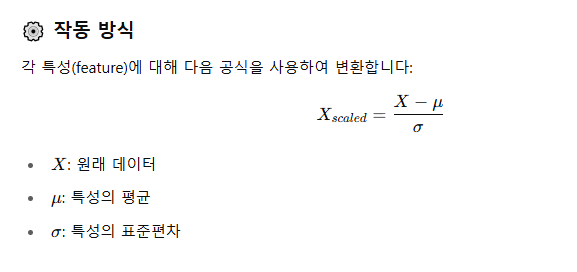

In [2]:
#해설 인강보고 정답 확인하기 다시!!!

#1) 결측치 제거
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

#2) 가장 많이 수강한 과목 필터링 (value_counts쓰면 가장큰 순서대로 해줌)
id = df['id_assessment'].value_counts().idxmax()
cond = df['id_assessment'] == id
df = df[cond]
#3) 과목점수 스탠다스 스케일 (변경된 값만 필요하기 떄문에 fit학습하고 transform변경까지 가능)
#근데 핏 트랜스폼 할때 score값이 시리즈로 되어있음 -> 시리즈로 되면 학습이 안되어서 -> 데이터 프레임으로 만들어줘야함 -> [[]] 이렇게 두번 감싸주면 데이터 프레임이 됨!
#우리 2과목에서 cols안에 []로 넣어줬는데 이걸 cols로 넣었으니 이후 작업시 [cols]로 넣으면 사실은 [[cols]]이렇게 된거였다는거임 즉) 일반적인거는 [[]] 두번해서 넣어주면 데이터 프레임으로 됨
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['score'] = scaler.fit_transform(df[['score']])

#4) 가장 큰값
print(round(df['score'].max(),3))

id_assessment         0
student_id            0
study_period_days     0
score                21
dtype: int64
id_assessment        0
student_id           0
study_period_days    0
score                0
dtype: int64
2.183


### 문제2. DE1~DE77컬럼 중 주가지수의 종가 "close"와 가장 상관관계가 높은 변수를 찾아, 해당 변수의 평균값을 구하시오. (반올림하여 소수 넷째자리까지 계산)

In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_1/stock_market.csv")
#실패

In [4]:
#상관관계가 양의상관관계일수도 있고 음의 상관관계일 수 도 있음


#1) close 와의 상관관계(절대값) (절대 값하는 이유는 양수 음수 다있어서 동일한 조건에서 보기위함임)
df_corr = df.corr()['close'].abs()

#2)상관관계가 높은 변수명
col = df_corr.loc['DE1':'DE77'].idxmax()


#3) #2)에서 구한 변수명의 평균 값
print(round(df[col].mean(),4))

-0.0004


222.32045121104144

### 문제3. IQR을 이용해 이산화탄소(CO2) 이상치 수를 찾으시오

- Q1 (제 1사분위수): 하위 25% 값
- Q3 (제 3사분위수): 상위 25% 값
- IQR (사분위수 범위): IQR = Q3 - Q1

- lower (하한선): Q1 - 1.5 * IQR, 이 값보다 작은 데이터는 이상치로 간주
- upper (상한선): Q3 + 1.5 * IQR, 이 값보다 큰 데이터는 이상치로 간주



In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_1/air_quality.csv")


In [6]:
df.head()

,Date,CO,CO2,O2
0,2024-01-01 00:00:00,0.549671,383.037632,21.248286
1,2024-01-01 01:00:00,0.486174,392.362513,21.183324
2,2024-01-01 02:00:00,0.564769,385.065473,19.963480
3,2024-01-01 03:00:00,0.652303,402.760451,21.479584
4,2024-01-01 04:00:00,0.476585,429.929463,19.409917


In [ ]:
#내가 한 싶패 코드
# 실패 이유 : lower와 upper를 이상하게 구함 저 lower, upper값이 < 이거 뒤, > 이거 앞의 값인데 두번을 하니 나올 수 가 없음
            # 그리고 cond1과 cond2 구할 떄 | 이걸 썻어야함

Q1 = df['CO2'].quantile(.25)
Q3 = df['CO2'].quantile(.75)
IQR = Q3- Q1
lower = df['CO2'] < Q1 - (1.5*IQR)
upper = df['CO2'] > Q3 + (1.5*IQR)

# cond1 = len(df['CO2'] < lower)
# cond2 = len(df['CO2'] > upper)


34.92822611304376


In [7]:
# 해설

#1) IQR 계산
Q1 = df['CO2'].quantile(.25)
Q3 = df['CO2'].quantile(.75)
IQR = Q3- Q1

#2) 상한 및 하한 계산
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper,lower)

#3) 이상치
cond1 = df['CO2'] < lower
cond2 = df['CO2'] > upper
outliers = df[cond1 | cond2]

#4) 이상치 수
print(len(outliers))

#더하는 다른방법
print(cond1.sum() + cond2.sum())

#주의!!!
#len은 갯수를 세는 것으로 True와 False값을 모두 출력하므로 값이 달라짐 그래서 1의값만 나오게 하려면 sum으로 해야 0이 더해져도 결과에 변화를 안미침

471.17077250802515 331.4578680558501
304
304
